# ML Project 
# Heart Failure Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt ## fpr plotting roc curve and confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report #for making confusion matrix
from sklearn.preprocessing import StandardScaler

#importing data set
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [2]:
# to check wether there are any null/missing values in data set
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

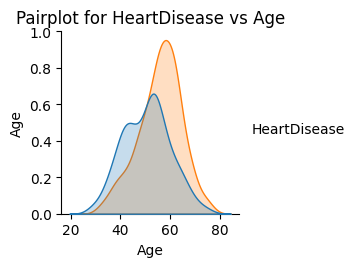

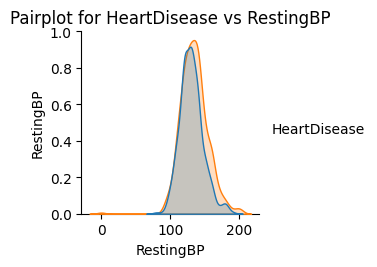

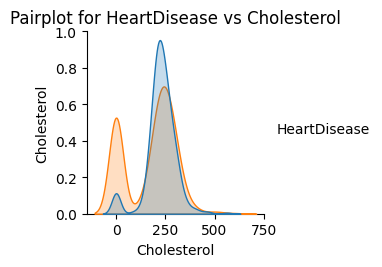

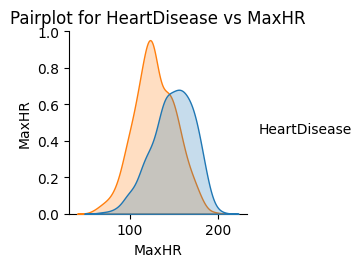

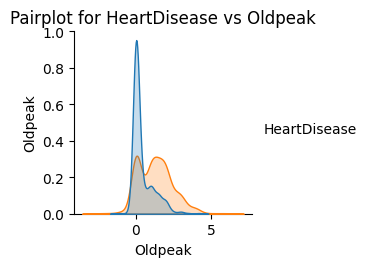

In [3]:
#EDA
parameters = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Loop through each parameter and create pairplot
#showing the relationship between the Heart Disease and the specific parameter. 
#Each pairplot illustrates how the distribution of lHeart Disease varies across 
#different categories or values of the parameter.
for param in parameters:
    sns.pairplot(df, hue='HeartDisease', vars=[param])
    plt.title(f'Pairplot for HeartDisease vs {param}')
    plt.show()


<Figure size 10000x10000 with 0 Axes>

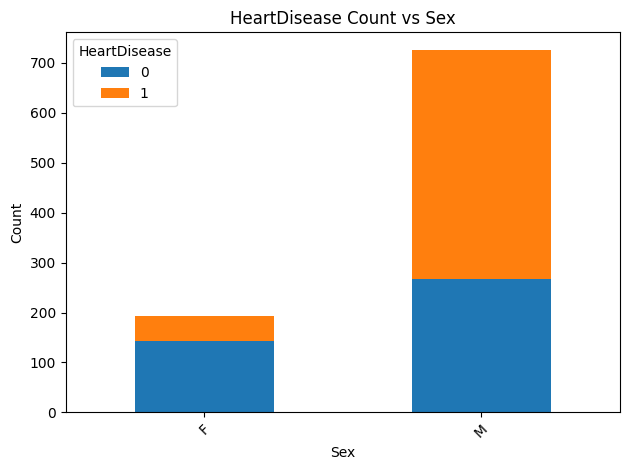

<Figure size 10000x10000 with 0 Axes>

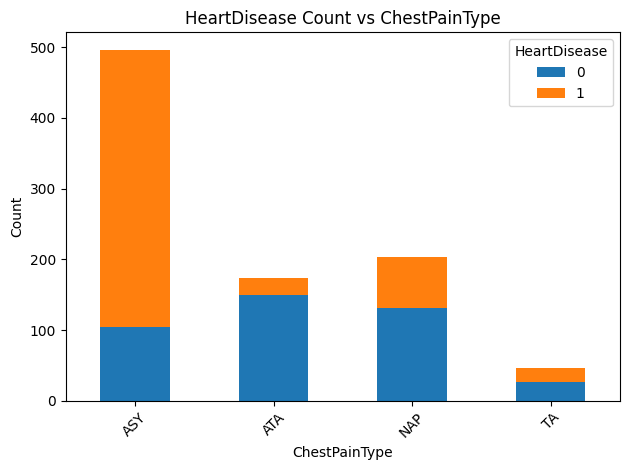

<Figure size 10000x10000 with 0 Axes>

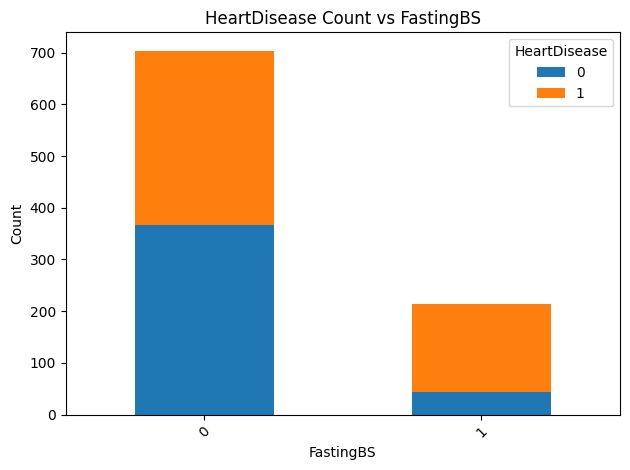

<Figure size 10000x10000 with 0 Axes>

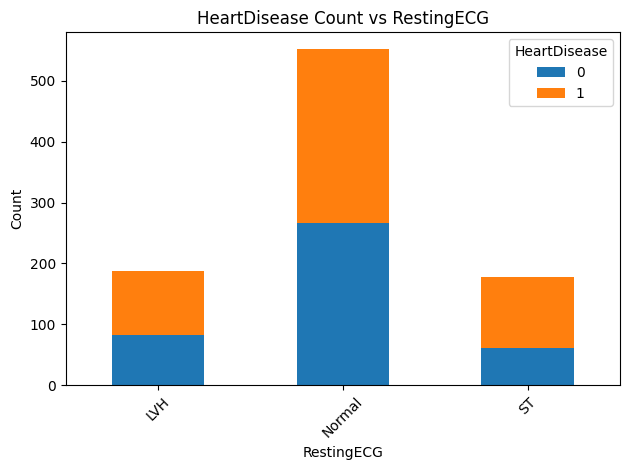

<Figure size 10000x10000 with 0 Axes>

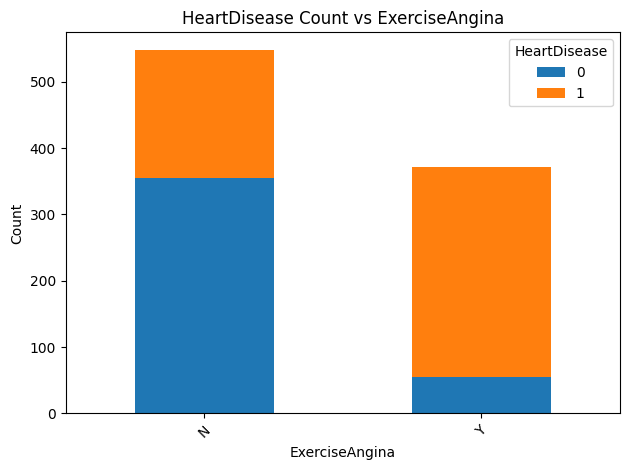

<Figure size 10000x10000 with 0 Axes>

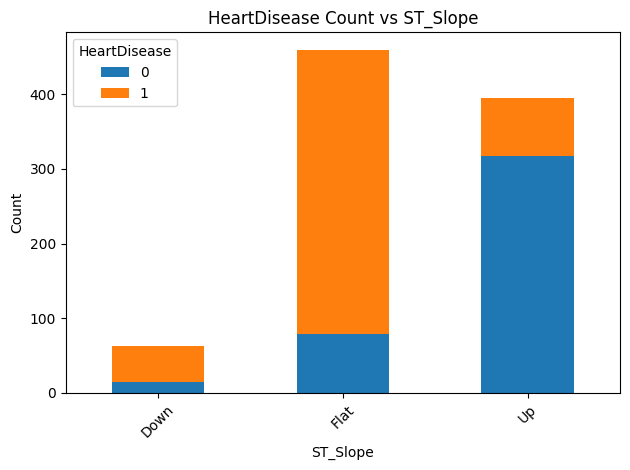

In [4]:
# Bar graphs showing count of Both HeartDisease (Yes =1, no = 0) wrt diff parameters.
parameters = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Plotting HeartDisease count vs different parameters
for param in parameters:
    plt.figure(figsize=(100, 100))
    df.groupby([param, 'HeartDisease']).size().unstack().plot(kind='bar', stacked=True)
    plt.title(f'HeartDisease Count vs {param}')
    plt.xlabel(param)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='HeartDisease')
    plt.tight_layout()
    plt.show()

C:\Users\2105392\anaconda3\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


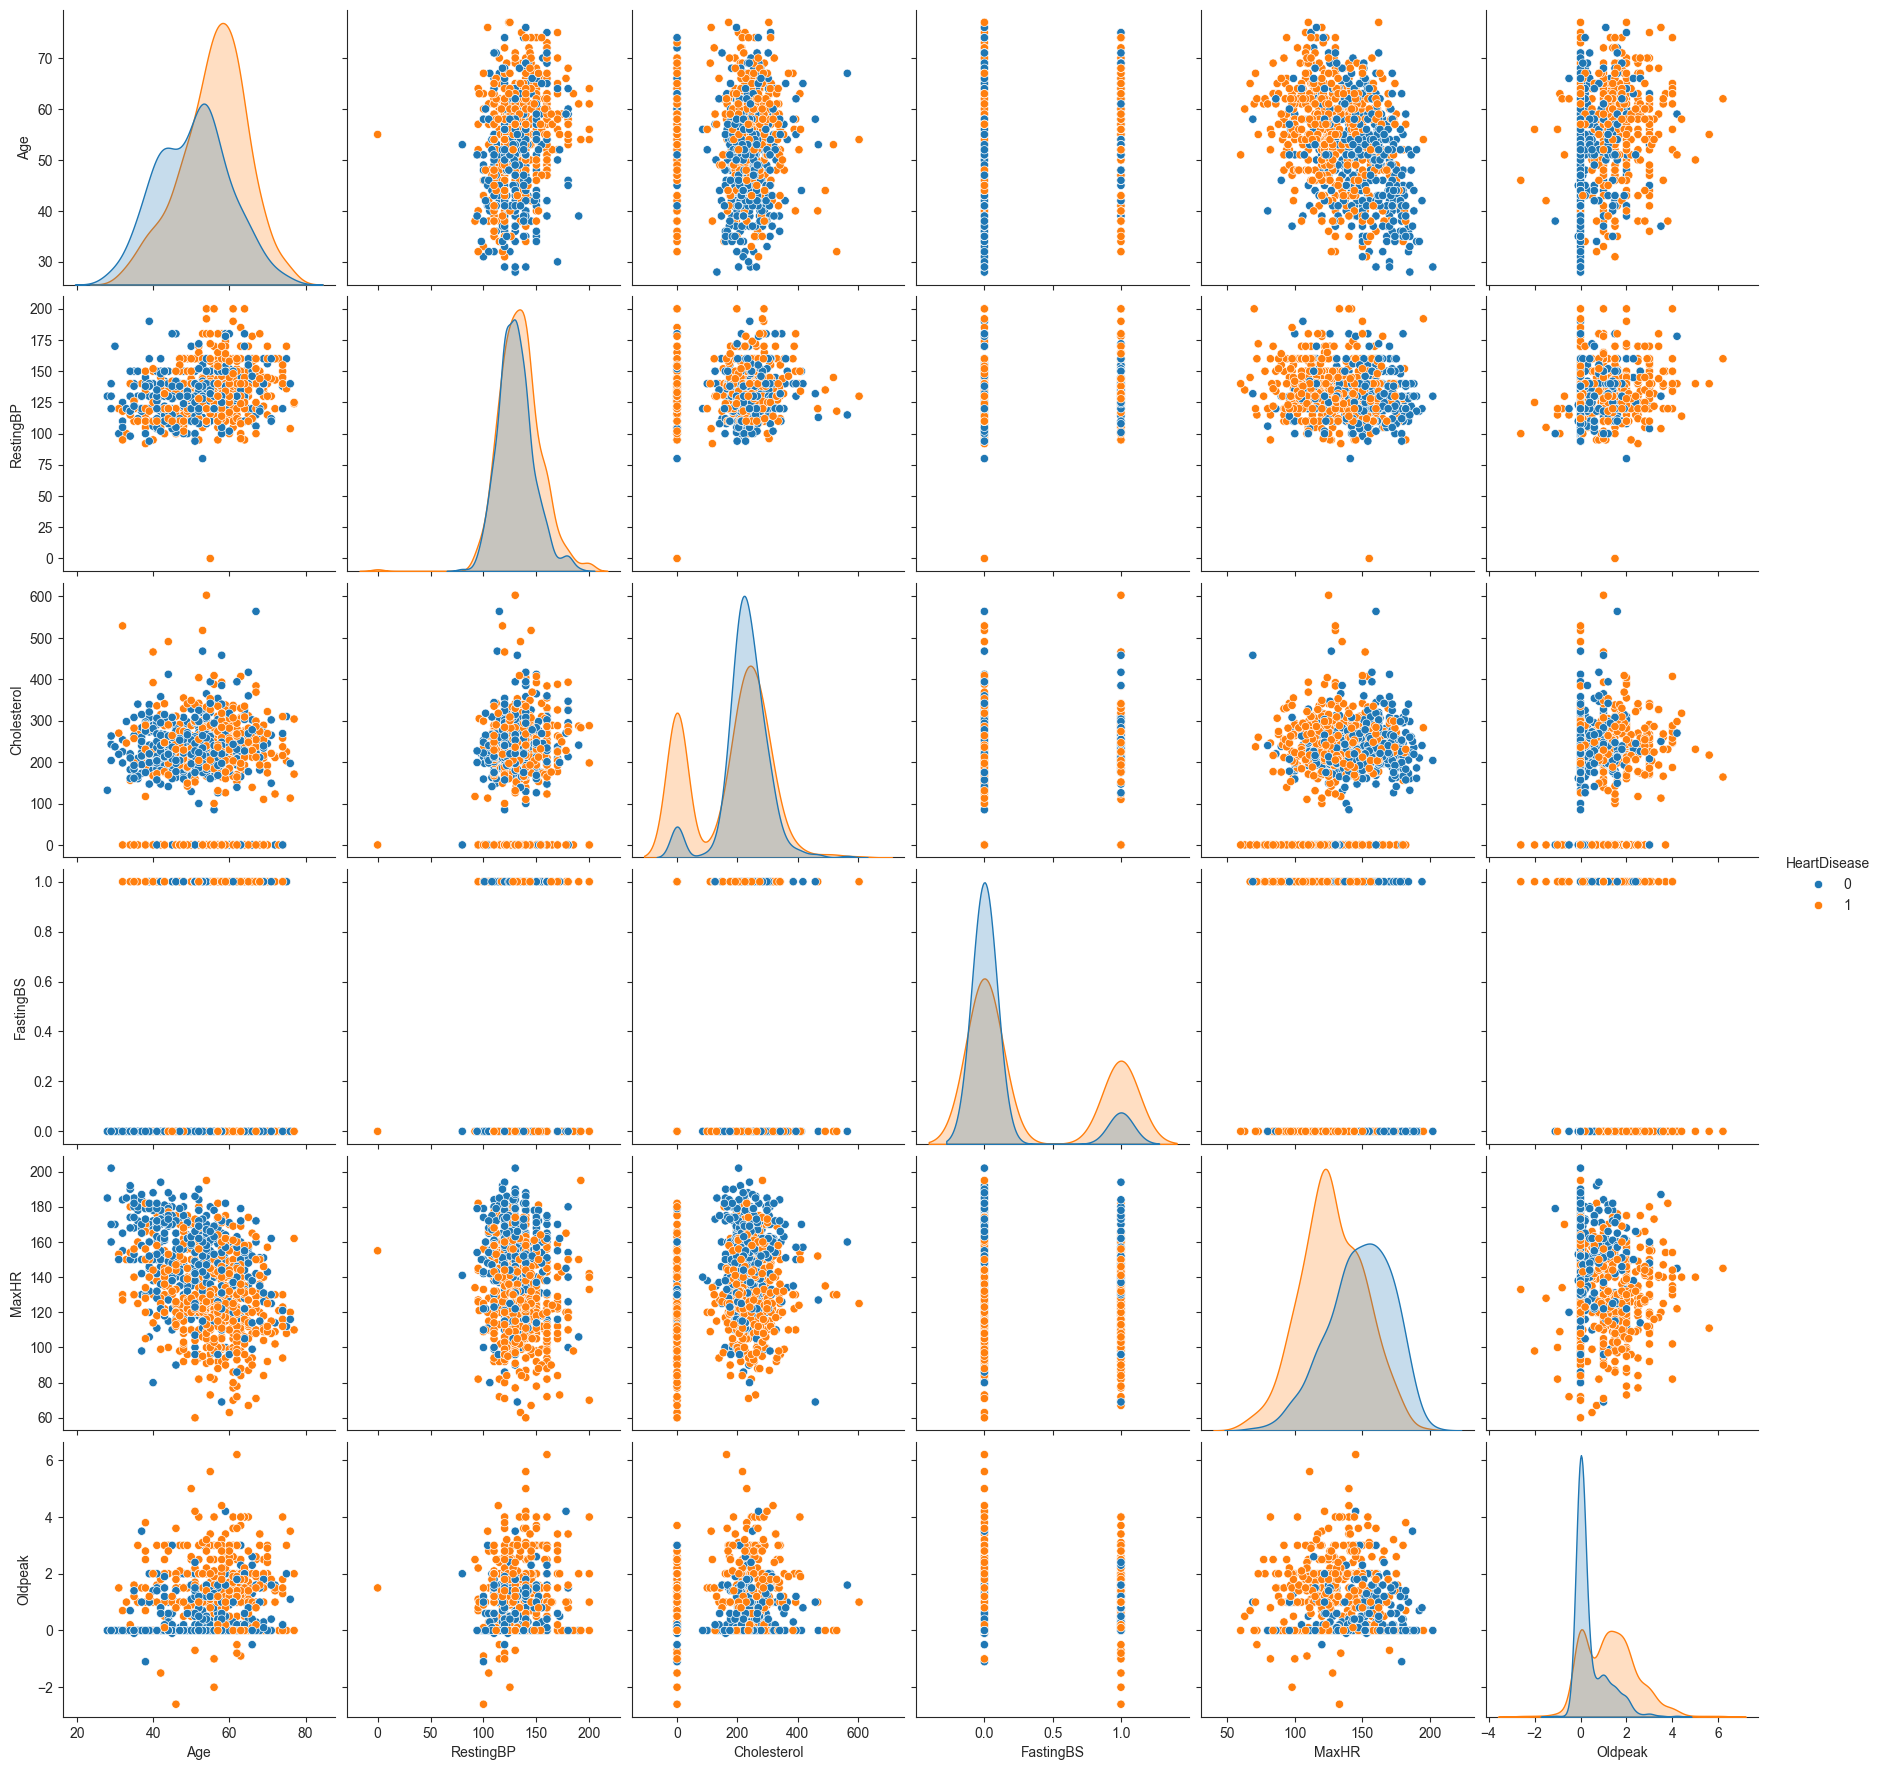

In [5]:
# Select numeric columns only
data = df.select_dtypes(include=np.number)


sns.set_style("ticks")
sns.pairplot(data, hue='HeartDisease', size=3)
plt.show()

<Axes: >

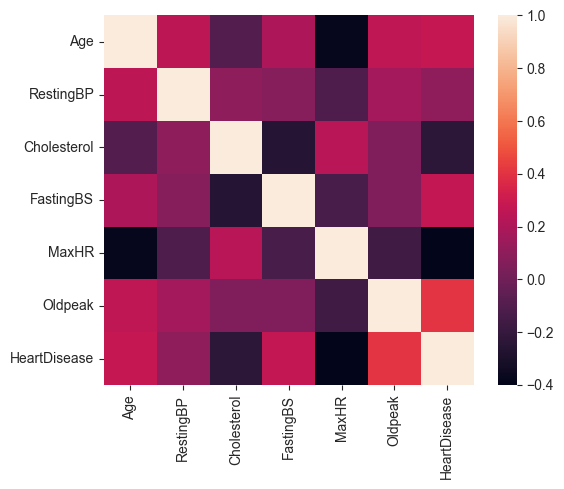

In [8]:
cor = data.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot cor as a heat map

In [9]:
# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [10]:
# Move 'HeartDisease' column to the last position
heart_disease_column = df_encoded.pop('HeartDisease')
df_encoded['HeartDisease'] = heart_disease_column
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True,0
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False,1
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True,0
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False,1
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False,1
914,68,144,193,1,141,3.4,True,False,False,False,True,False,False,True,False,1
915,57,130,131,0,115,1.2,True,False,False,False,True,False,True,True,False,1
916,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False,1


In [11]:
df_encoded.isnull().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
HeartDisease         0
dtype: int64

In [12]:
##SPLIT data set into independent and dependent features
X = df_encoded.iloc[:, :-1] # take all columns except the last one
y = df_encoded.iloc[:, -1]  # take only the last column

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

# Model -1 Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()

In [15]:
LR_classifier.fit(X_train, y_train)

C:\Users\2105392\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
##prediction -> predicting the species of test data
y_pred_log_reg = LR_classifier.predict(X_test)
y_pred_log_reg

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [17]:
##accuracy score for logistic regression model
logistic_reg_score = accuracy_score(y_pred_log_reg, y_test)
print("Accuracy Score for Logistic Regression -> ", logistic_reg_score)

Accuracy Score for Logistic Regression ->  0.8869565217391304


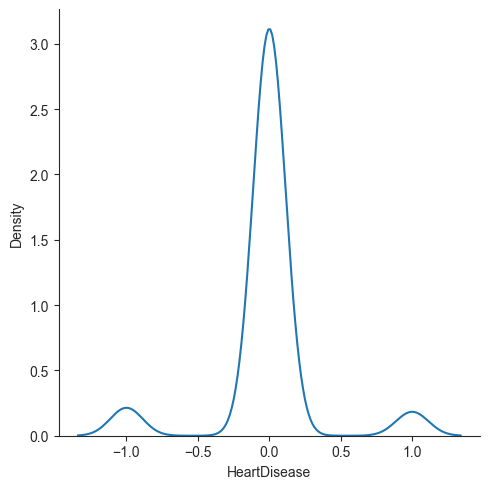

In [18]:
#creates a seaborn distribution plot (displot) to visualize the distribution of the residuals 
#(the differences between predicted values and actual values) resulting from a logistic regression model.
sns.displot(y_pred_log_reg-y_test, kind= 'kde')

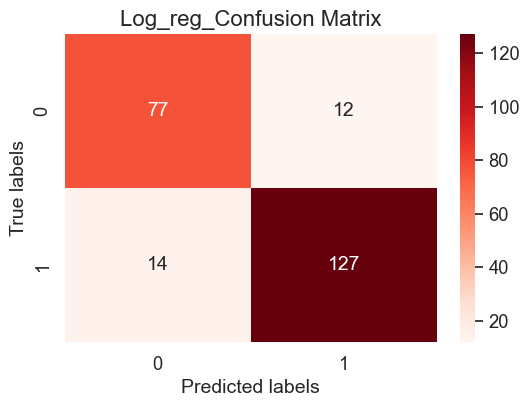

In [19]:
## confusion matrix for logistic regression
log_reg_confusion_matrix = confusion_matrix(y_test, y_pred_log_reg)
log_reg_confusion_matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)  # Adjust font scale for better visualization

# Create heatmap
sns.heatmap(log_reg_confusion_matrix, annot=True, fmt="d", cmap="Reds", annot_kws={"size": 14})

# Adding labels
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Log_reg_Confusion Matrix', fontsize=16)
plt.show()

In [20]:
## precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,y_pred_log_reg )
print('Average precision-recall score : {0:0.2f}'.format(average_precision))

Average precision-recall score : 0.88


In [21]:
##importing metrices for roc curve and AUc curve
from sklearn.metrics import roc_curve, roc_auc_score

In [22]:
y_pred_proba_log_reg = LR_classifier.predict_proba(X_test)[::,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_proba_log_reg)
auc = roc_auc_score(y_test, y_pred_log_reg)


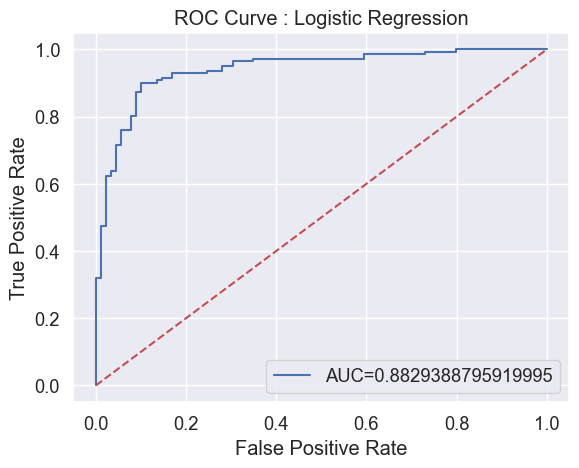

In [23]:
#plotting roc curve for logistic regression
import matplotlib.pyplot as plt

#create ROC curve
plt.plot(false_positive_rate1,true_positive_rate1,label="AUC="+str(auc))
plt.title('ROC Curve : Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="best")
plt.show()

In [24]:
print("roc_auc_score for Logistic Regression:",auc)

roc_auc_score for Logistic Regression: 0.8829388795919995


# Model- 2 KNN

In [25]:
# Calculate distance between two points. p=1 for Manhattan distance, p=2 for Euclidean distance

def minkowski_distance(a, b, p=1):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

In [26]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test


In [27]:
X_train_new=np.hstack((X_train[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']].values,X_train))
X_test_new=np.hstack((X_test[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']].values,X_test))

# Standardize the data values into a standard format
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Make predictions on test dataset with k=5 nearest neighbours and using Manhattan distance between data points

y_hat_KNN = knn_predict(X_train_new, X_test_new, y_train, y_test, k=5, p=1)

print(f"Self implemented KNN accuracy: {accuracy_score(y_test, y_hat_KNN)}")

# Testing to see results from sklearn.neighbors.KNeighborsClassifier for k=5

clf = KNeighborsClassifier(n_neighbors=5, p=1, n_jobs=-1)
clf.fit(X_train_new, y_train)
y_pred_KNN = clf.predict(X_test_new)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_test, y_pred_KNN)}")

Self implemented KNN accuracy: 0.8869565217391304
Sklearn KNN Accuracy: 0.8869565217391304


In [31]:
# Obtain accuracy score varying k from 1 to 30
accuracies = []
max_acc, max_acc_k=0,0

for k in range(1,30+1):
    y_hat_KNN = knn_predict(X_train_new, X_test_new, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_KNN))
    if accuracy_score(y_test, y_hat_KNN)>max_acc:
        max_acc=accuracy_score(y_test, y_hat_KNN)
        max_acc_k=k

clf = KNeighborsClassifier(n_neighbors=max_acc_k, p=1, n_jobs=-1)
clf.fit(X_train_new, y_train)
y_pred_KNN = clf.predict(X_test_new)

print(f"KNN Accuracy Score: {accuracy_score(y_test, y_pred_KNN)} for k={max_acc_k}")

KNN Accuracy Score: 0.9 for k=9


Text(0, 0.5, 'Accuracy (%)')

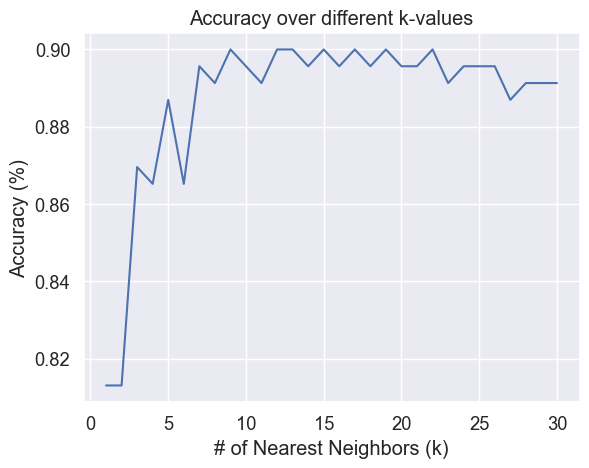

In [32]:
# Plot the Accuracy v/s k-values scores
plt.title('Accuracy over different k-values')
plt.plot(range(1,30+1), accuracies)
plt.xlabel('# of Nearest Neighbors (k)')
plt.ylabel('Accuracy (%)')

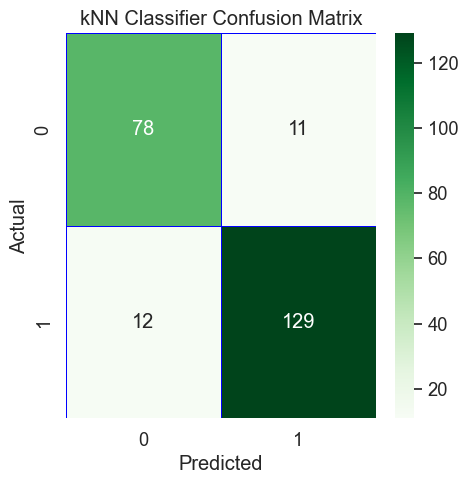

In [33]:
# Plotting Confusion Matrix for kNN Classifier
knn_cm = confusion_matrix(y_test, y_pred_KNN)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='blue', fmt='g', ax=ax, cmap="Greens")
plt.title('kNN Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# Precision and recall
from sklearn.metrics import average_precision_score
average_precision=average_precision_score(y_test, y_pred_KNN)
print(f"Average precision-recall score for kNN: {average_precision}")

Average precision-recall score for kNN: 0.8951830315845116


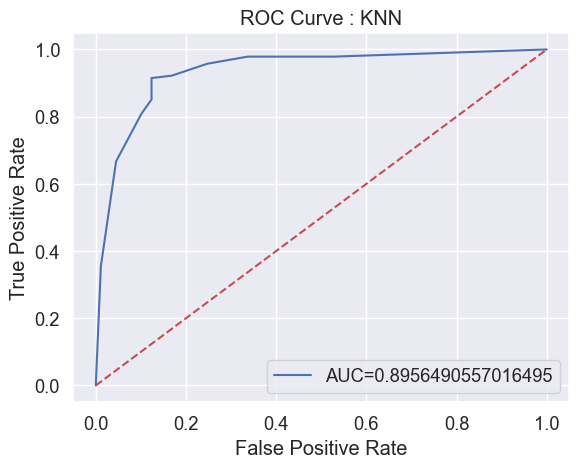

In [35]:
y_pred_proba_KNN = clf.predict_proba(X_test_new)[::,1]
false_positive_rate2, true_positive_rate2, threshold1 = roc_curve(y_test, y_pred_proba_KNN)
auc_KNN = roc_auc_score(y_test, y_pred_KNN)
#plotting roc curve for KNN
#create ROC curve
plt.plot(false_positive_rate2,true_positive_rate2,label="AUC="+str(auc_KNN))
plt.title('ROC Curve : KNN')

plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="best")
plt.show()

In [36]:
print("roc_auc_score for KNN :",auc_KNN)

roc_auc_score for KNN : 0.8956490557016495


# Model - 3 Naive Bayes

In [37]:
# Initialize and train the Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# Define the parameters grid
parameters = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Instantiate the Naive Bayes classifier
naive_bayes = GaussianNB()

# Instantiate GridSearchCV
NB_classifier = GridSearchCV(naive_bayes, parameters, cv=5, scoring='accuracy')

# Fit the GridSearchCV instance
NB_classifier.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [38]:
# Get the best parameters
best_params = NB_classifier.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = NB_classifier.best_estimator_

# Use the best estimator to make predictions
y_pred_NB = best_estimator.predict(X_test)

y_pred_NB

Best Parameters: {'var_smoothing': 1e-05}


array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [39]:
accuracy = accuracy_score(y_test, y_pred_NB)
print("Naive Bayes Accuracy Score:", accuracy)

Naive Bayes Accuracy Score: 0.8826086956521739


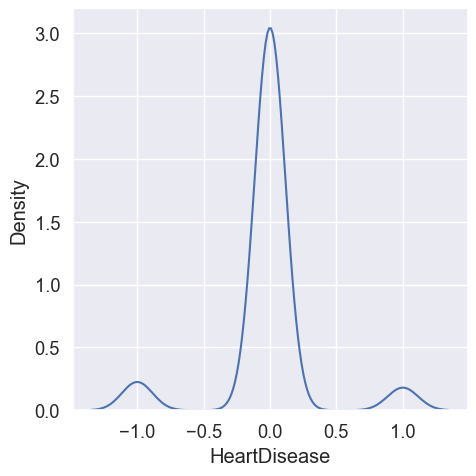

In [40]:
sns.displot(y_pred_NB-y_test, kind= 'kde')

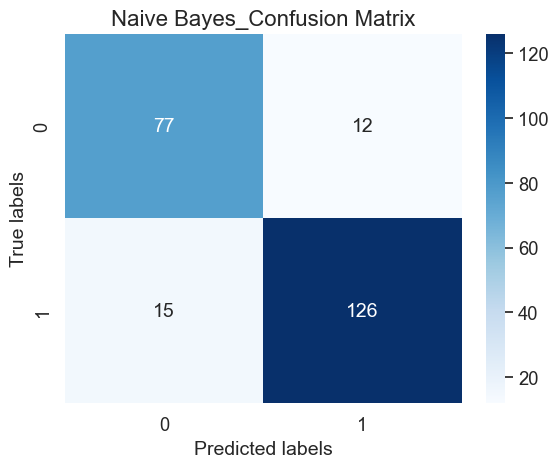

In [41]:
##Confusion matrix and Accuracy for NB 
NB_confusion_matrix = confusion_matrix(y_test, y_pred_NB)
NB_accuracy_score = accuracy_score(y_test,y_pred_NB)
# Create heatmap
sns.heatmap(NB_confusion_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 14})

# Adding labels
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Naive Bayes_Confusion Matrix', fontsize=16)
plt.show()

In [42]:
## precision and recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test,y_pred_NB)
print('Average precision-recall score : {0:0.2f}'.format(average_precision))

Average precision-recall score : 0.88


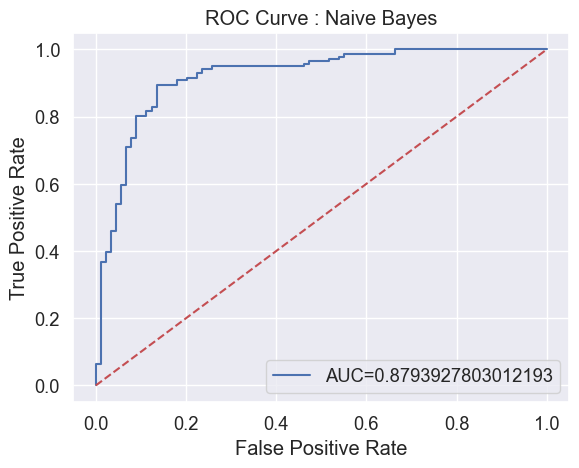

In [43]:
## Finding roc_curve and auc
y_pred_proba_NB = NB_classifier.predict_proba(X_test)[::,1]
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_pred_proba_NB)
auc_NB = roc_auc_score(y_test, y_pred_NB)
#plotting roc curve for Naive Bayes
#create ROC curve
plt.plot(false_positive_rate3,true_positive_rate3,label="AUC="+str(auc_NB))
plt.title('ROC Curve : Naive Bayes')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="best")
plt.show()

In [44]:
print('roc_auc_score for NB: ', auc_NB)

roc_auc_score for NB:  0.8793927803012193


## Comparision of all Three Model's ROC curve

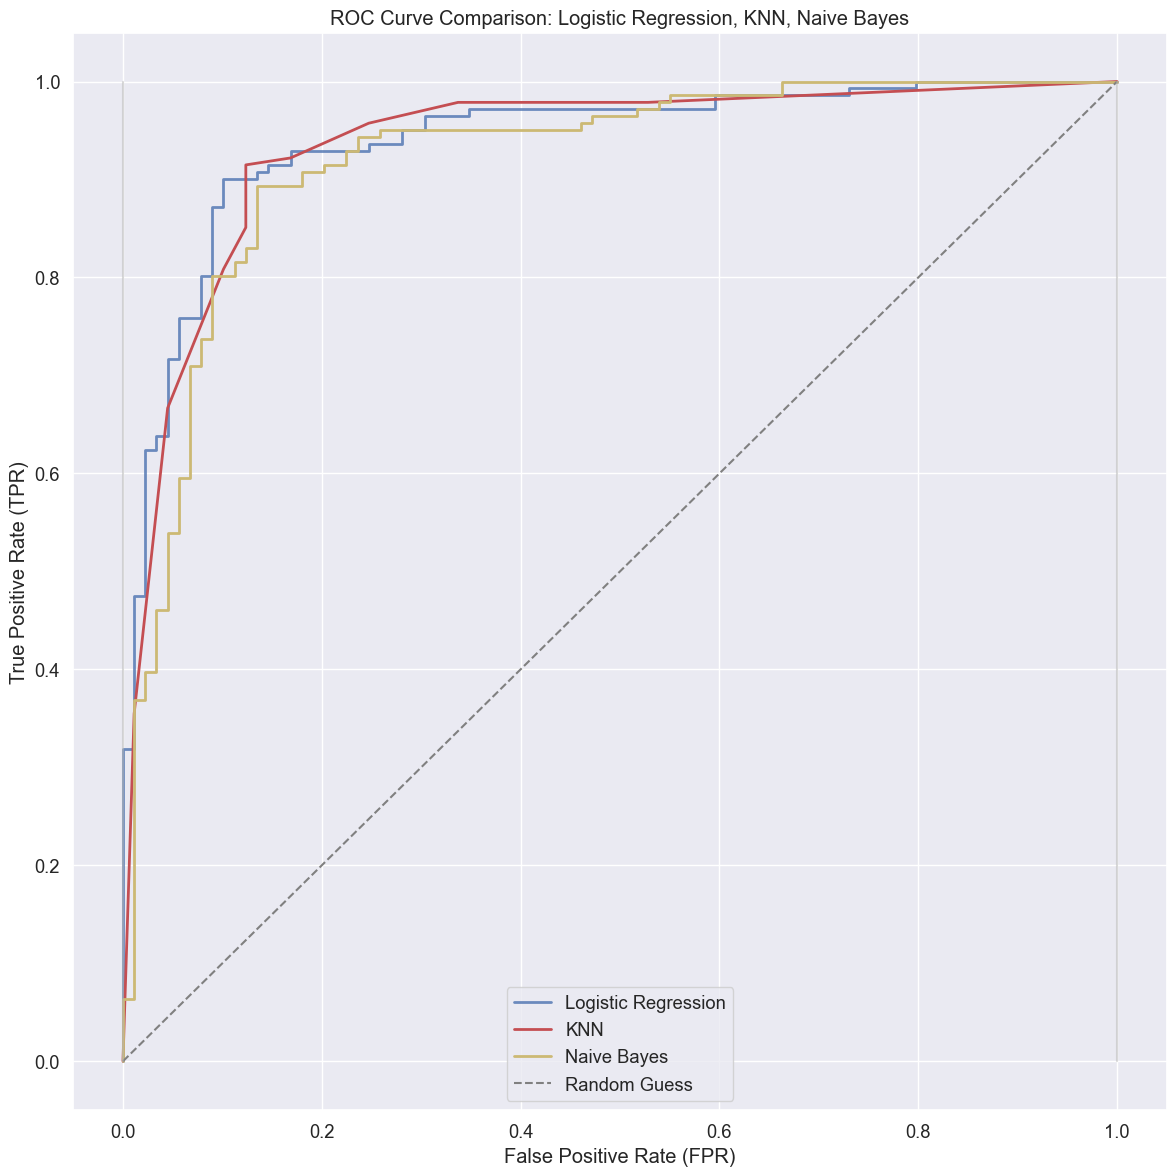

In [45]:
import matplotlib.pyplot as plt

# Plot with adjustments
plt.figure(figsize=(12, 12))
plt.plot(false_positive_rate1, true_positive_rate1, label='Logistic Regression', color='b', linewidth=2, alpha=0.8)
plt.plot(false_positive_rate2, true_positive_rate2, label='KNN', color='r', linewidth=2)
plt.plot(false_positive_rate3, true_positive_rate3, label='Naive Bayes', color='y', linewidth=2,linestyle='-')

# Add dashed line
plt.plot([0, 1], ls="--", color='gray', label='Random Guess')

# Add markers on axes
plt.plot([0, 0], [1, 0], c=".7", alpha=0.5)
plt.plot([1, 1], [0, 1], c=".7", alpha=0.5)

# Set labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison: Logistic Regression, KNN, Naive Bayes')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()